In [31]:
#!pip3 install tensorflow

In [4]:
import numpy as np
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.optimizers import SGD
print('installation_last')

installation_last


In [5]:
# For the purpose of Graphing and ploting model
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


In [7]:
# Reading Data by using pandas library

train=pd.read_csv('Datasets/sign_mnist_train.csv')
test=pd.read_csv('Datasets/sign_mnist_test.csv')

In [8]:
print('train dataset shape', train.shape)
print('test dataset shape', test.shape)

train dataset shape (27455, 785)
test dataset shape (7172, 785)


## **Step 2:** *Analyse and Visualize of Dataset*

### *For Training Dataset*

In [7]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
#train.describe()

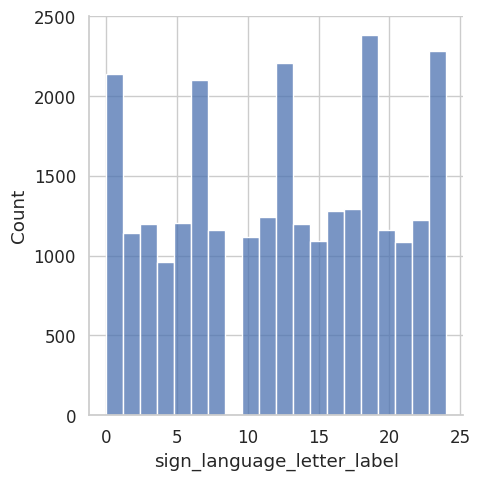

In [9]:
# distplot is depricated in sns version 0.14 so we have to use "displot" remove it before submiting
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 10]})
sns.displot(train['label'], kind='hist', kde=False, bins=20, rug_kws={"alpha": 1}).set(xlabel='sign_language_letter_label', ylabel='Count');

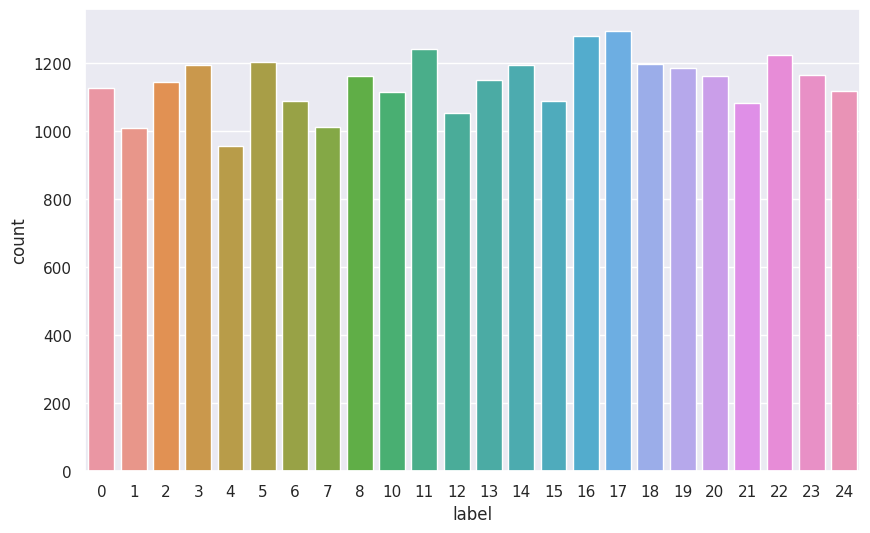

In [10]:
sns.set(rc={"figure.figsize": [10, 6]})
sns.countplot(x=train['label']);

### *For Test Dataset*

In [11]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [12]:
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


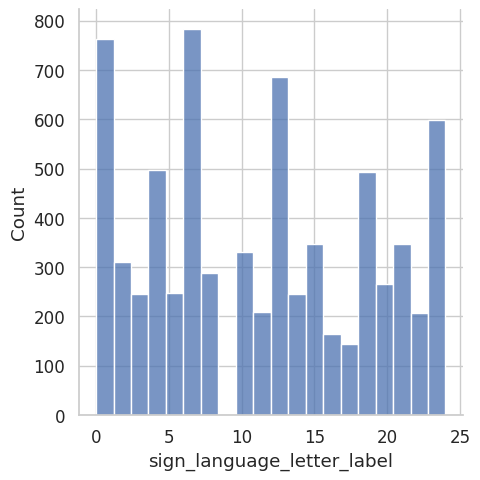

In [13]:
# distplot is depricated in sns version 0.14 so we have to use "displot" remove it before submiting
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 10]})
sns.displot(test['label'], kind='hist', kde=False, bins=20, rug_kws={"alpha": 1}).set(xlabel='sign_language_letter_label', ylabel='Count');

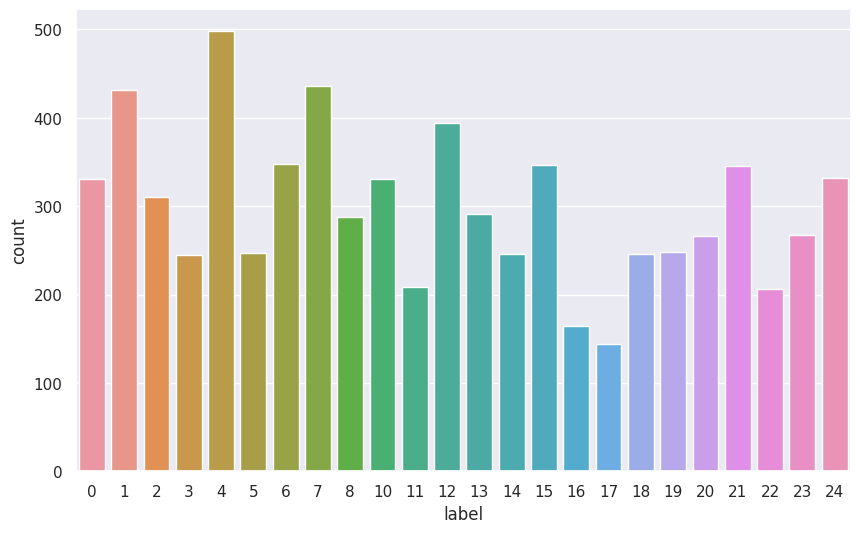

In [14]:
sns.set(rc={"figure.figsize": [10, 6]})
sns.countplot(x=test['label']);

## **Step 3:** *Preprocessing Data*

#### *Train Info*

In [9]:
display(train.info())
display(train.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


#### *Test Info*

In [10]:
display(test.info())
display(test.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


#### *Dividing Data into features and label*

 *Train*

In [11]:
y_train = train['label']
X_train = train.drop(['label'], axis=1)
X_train = X_train.astype('float32') / 255
print("y_train shape :",y_train.shape, ", X_train shape: ",X_train.shape)


y_train shape : (27455,) , X_train shape:  (27455, 784)


In [12]:
# Displaying the train labels
display(y_train)

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

 *Test*

In [13]:
y_test = test['label']
X_test = test.drop(['label'], axis=1)
X_test = X_test.astype('float32')/255
print("y_test shape :",y_test.shape, ", X_test shape :",X_test.shape)

y_test shape : (7172,) , X_test shape : (7172, 784)


In [14]:
# Displaying the test labels
display(y_test)

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [15]:
y_test.unique()

array([ 6,  5, 10,  0,  3, 21, 14,  7,  8, 12,  4, 22,  2, 15,  1, 13, 19,
       18, 23, 17, 20, 16, 11, 24], dtype=int64)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27455, 784)
(27455,)
(7172, 784)
(7172,)


In [17]:
X = X_train.iloc[:,:]
X_train=np.array(X)
X_train=np.array([np.reshape(i,(28,28)) for i in X_train])

Z = X_test.iloc[:,:]
X_test=np.array(Z)
X_test=np.array([np.reshape(i,(28,28)) for i in X_test])

num_classes=26

y_train = np.array(y_train).reshape(-1)
y_train = (np.ceil(y_train)).astype(int)

y_test = np.array(y_test).reshape(-1)
y_test = (np.ceil(y_test)).astype(int)



y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

X_train = X_train.reshape((27455,28,28,1))
X_test = X_test.reshape((7172,28,28,1))

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27455, 28, 28, 1)
(27455, 26)
(7172, 28, 28, 1)
(7172, 26)


### **Step 4:** *Create a Deep learning model*

#### *Model*

In [26]:
model1 = Sequential()
model1.add(Conv2D(filters = 8, kernel_size = (3,3), padding = 'same', strides=(1,1), activation = 'relu', input_shape = (28, 28,1)))
model1.add(Conv2D(filters = 8, kernel_size = (3,3), padding = 'same', strides=(1,1), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Conv2D(filters = 16 , kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(Dropout(0.5))
# model1.add(Conv2D(filters = 16 , kernel_size = (3,3), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (4, 4)))
# model1.add(Dropout(0.5))
# model1.add(Conv2D(filters = 16 , kernel_size = (3,3), padding = 'same', activation = 'relu'))
# model1.add(Dropout(0.5))
model1.add(Dense(128,activation="relu"))
model1.add(Flatten())
model1.add(Dense(26, activation='softmax'))

2023-01-10 09:11:24.612107: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-10 09:11:24.612141: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-10 09:11:24.612162: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-8242e0): /proc/driver/nvidia/version does not exist
2023-01-10 09:11:24.612385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                    

In [28]:
# !pip3 install plot_model
# plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### **Step 6:** *Compile the model*

#### *Using optimizer SGD with learning rate 0.001*

In [29]:
# Compiling the model
model1.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

### **Step 5:** *Fit the model*

In [30]:
# fiting the model
model1.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
275/275 [==============================] - 5s 14ms/step - loss: 3.2546 - accuracy: 0.0632
Epoch 2/100
275/275 [==============================] - 4s 14ms/step - loss: 3.2506 - accuracy: 0.0695
Epoch 3/100
275/275 [==============================] - 4s 14ms/step - loss: 3.2462 - accuracy: 0.0608
Epoch 4/100
275/275 [==============================] - 4s 14ms/step - loss: 3.2410 - accuracy: 0.0582
Epoch 5/100
275/275 [==============================] - 4s 14ms/step - loss: 3.2346 - accuracy: 0.0516
Epoch 6/100
275/275 [==============================] - 4s 14ms/step - loss: 3.2269 - accuracy: 0.0492
Epoch 7/100
275/275 [==============================] - 4s 14ms/step - loss: 3.2180 - accuracy: 0.0530
Epoch 8/100
275/275 [==============================] - 4s 14ms/step - loss: 3.2084 - accuracy: 0.0546
Epoch 9/100
275/275 [==============================] - 4s 14ms/step - loss: 3.1983 - accuracy: 0.0540
Epoch 10/100
275/275 [==============================] - 4s 14ms/step - loss: 3.188

#### *Using adam optimizer and categorical loss*

### **Step 7:** *Evaluate the model by checking the accuracy*

In [31]:
accuracy = model1.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 1s 3ms/step - loss: 0.6767 - accuracy: 0.7999
Accuracy:  0.7999163269996643


In [32]:
print("Evaluating on training set...")
(loss,accuracy)=model1.evaluate(x=X_train,y=y_train,batch_size=32)
print("loss={:.4f}%".format(loss,accuracy*100))

print("Evaluating on testing set...")
(loss,accuracy)=model1.evaluate(x=X_test,y=y_test,batch_size=32)
print("loss={:.4f}%".format(loss,accuracy*100))

Evaluating on training set...
858/858 [==============================] - 3s 3ms/step - loss: 0.4817 - accuracy: 0.9068
loss=0.4817%
Evaluating on testing set...
225/225 [==============================] - 1s 3ms/step - loss: 0.6767 - accuracy: 0.7999
loss=0.6767%


#### *Saving the model*

In [33]:
model1.save('model1')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


### **Step 8:** *Test the model to see if it is predicting the correct symbol of the sign language*

In [21]:
#from keras.models import load_model

In [19]:
model1 = load_model("model1")
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'load_model' is not defined

In [10]:
img = X_test[0]
test_img = img.reshape((1,28,28))
img_class = np.argmax(model1.predict(test_img), axis=-1)
prediction = img_class[1]
classname = img_class[0]
print("Class: ",classname)

1/1 [==============================] - 0s 161ms/step
Class:  6


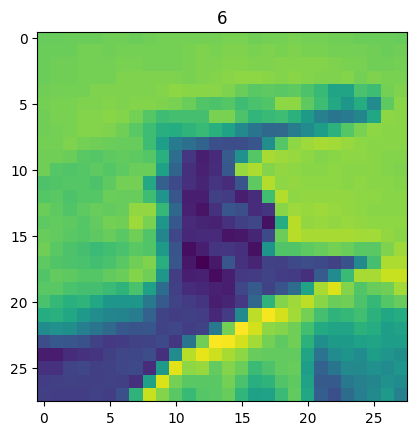

In [11]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [37]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

### **Step 9:** *Get the training and validation loss as well as the accuracy by running 50 epochs for the dataset fit in the same model* 

In [38]:
#train test Split
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, train_size=0.2, random_state=1)

In [39]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(val_X, val_y))

Epoch 1/50
172/172 [==============================] - 4s 21ms/step - loss: 1.0291 - accuracy: 0.7073 - val_loss: 0.8686 - val_accuracy: 0.7556
Epoch 2/50
172/172 [==============================] - 3s 19ms/step - loss: 0.6680 - accuracy: 0.7693 - val_loss: 0.9083 - val_accuracy: 0.7298
Epoch 3/50
172/172 [==============================] - 3s 20ms/step - loss: 0.5813 - accuracy: 0.8011 - val_loss: 0.6864 - val_accuracy: 0.8405
Epoch 4/50
172/172 [==============================] - 3s 20ms/step - loss: 0.4807 - accuracy: 0.8343 - val_loss: 0.6373 - val_accuracy: 0.8296
Epoch 5/50
172/172 [==============================] - 3s 20ms/step - loss: 0.4297 - accuracy: 0.8543 - val_loss: 0.5195 - val_accuracy: 0.8941
Epoch 6/50
172/172 [==============================] - 3s 20ms/step - loss: 0.3825 - accuracy: 0.8671 - val_loss: 0.4486 - val_accuracy: 0.8914
Epoch 7/50
172/172 [==============================] - 3s 20ms/step - loss: 0.3391 - accuracy: 0.8763 - val_loss: 0.3675 - val_accuracy: 0.9176

#### *Training and Validation loss*

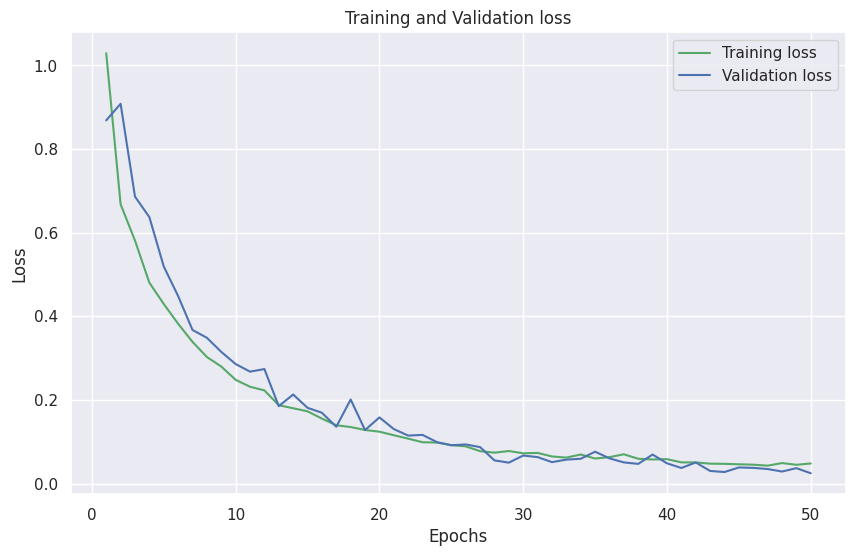

In [40]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### *Training and Validation accuracy*

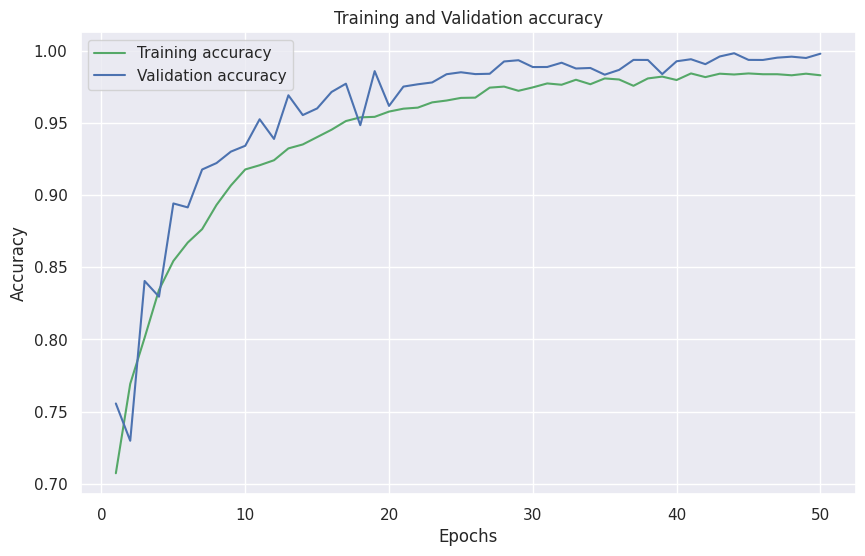

In [41]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()